In [1]:
%pylab inline

import libaarhusxyz
import paperlib


Populating the interactive namespace from numpy and matplotlib


Right handed coordinate system. x is forward, y to the right, z down

## Load the data from disk
generated by seperate notebook

In [2]:
xyz = libaarhusxyz.XYZ("outputs/em1dtm_stitched_data.xyz")

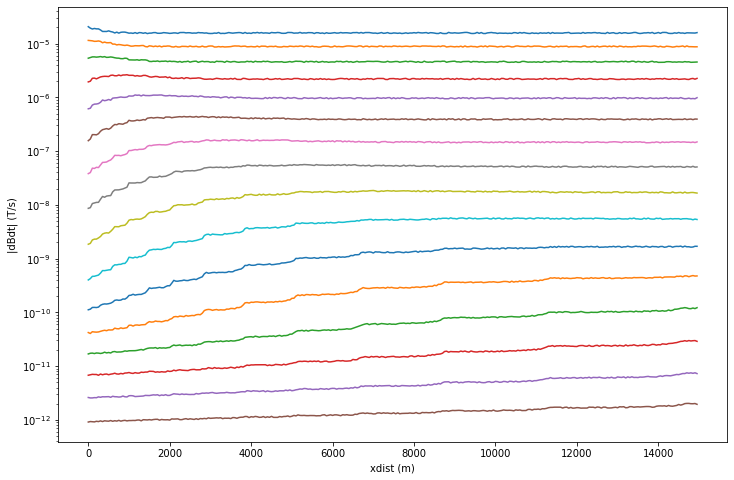

In [3]:
plt.figure(figsize=(12, 8))
xyz.plot_line(0, ax=plt.gca())
plt.show()

# Define the instrument

In [11]:
class MySystem(paperlib.SingleRecvTEMXYZSystem):
    area=340
    i_max=1
    

## Do the inversion

In [12]:
inv = MySystem(xyz)
xyzsparse, xyzl2 = inv.invert()

>> Use multiprocessing for parallelization
>> n_cpu: 3
model has any nan: 0
============================ Inexact Gauss Newton ============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
x0 has any nan: 0
   0  6.97e+01  3.41e+05  0.00e+00  3.41e+05    6.86e+03      0              
   1  3.49e+01  9.45e+04  1.69e+02  1.00e+05    4.61e+03      1              
   2  1.74e+01  2.28e+04  4.84e+02  3.12e+04    3.18e+03      0   Skip BFGS  
   3  8.72e+00  1.05e+04  6.05e+02  1.58e+04    6.54e+02      0              
   4  4.36e+00  5.96e+03  9.27e+02  1.00e+04    3.74e+02      0   Skip BFGS  
   5  2.18e+00  3.51e+03  1.32e+03  6.38e+03    2.51e+02      0   Skip BFGS  
Reached starting chifact with l2-norm regularization: Start IRLS steps...
eps_p: 1.5235415214906833 eps_q: 1.5235415214906833
>> Fix Jmatrix
   6  1.09e+00  2.00e+03  1.57e+03  3.71e+03    2.07e+02      

# Plot the results

In [5]:
import importlib
importlib.reload(libaarhusxyz.xyz)
importlib.reload(libaarhusxyz)
importlib.reload(paperlib)

<module 'paperlib' from '/home/redhog/Projects/Emerald/paper-raw-em-interpretation/paperlib/__init__.py'>

(-200.0, 0.0)

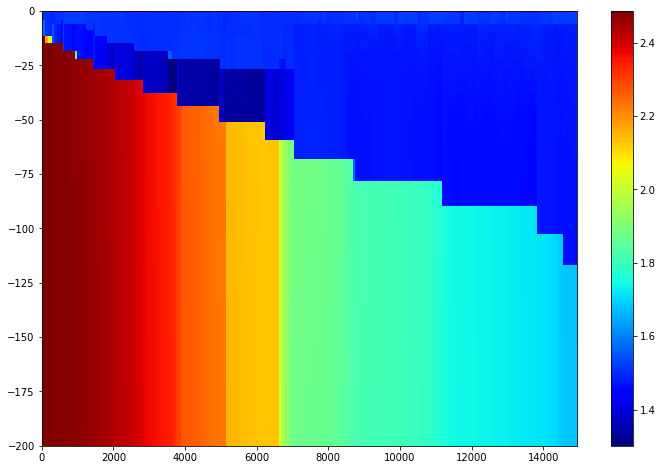

In [6]:
fig = plt.figure(figsize=(12, 8))
ax=plt.gca()
xyzsparse.plot_line(0, ax=ax, cmap="jet")
fig.colorbar(mappable=ax.collections[0])
ax.set_ylim(-200, 0)

(-200.0, 0.0)

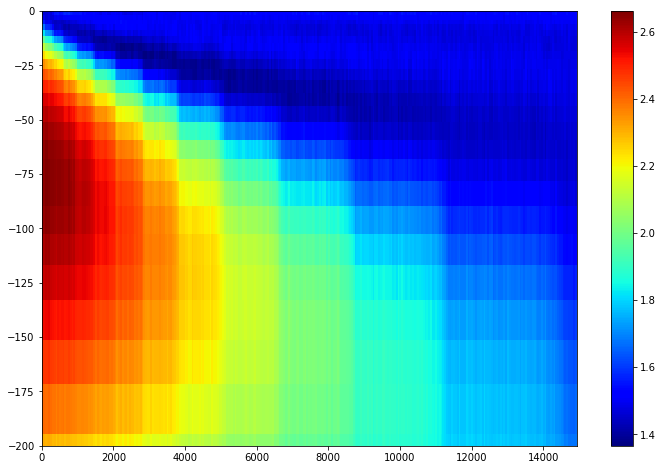

In [7]:
fig = plt.figure(figsize=(12, 8))
ax=plt.gca()
xyzl2.plot_line(0, ax=ax, cmap="jet")
fig.colorbar(mappable=ax.collections[0])
ax.set_ylim(-200, 0)

In [8]:
xyzl2fwd = MySystem(xyzl2, times=inv.times).forward()
xyzsparsefwd = MySystem(xyzsparse, times=inv.times).forward()

>> Use multiprocessing for parallelization
>> n_cpu: 3
>> Use multiprocessing for parallelization
>> n_cpu: 3


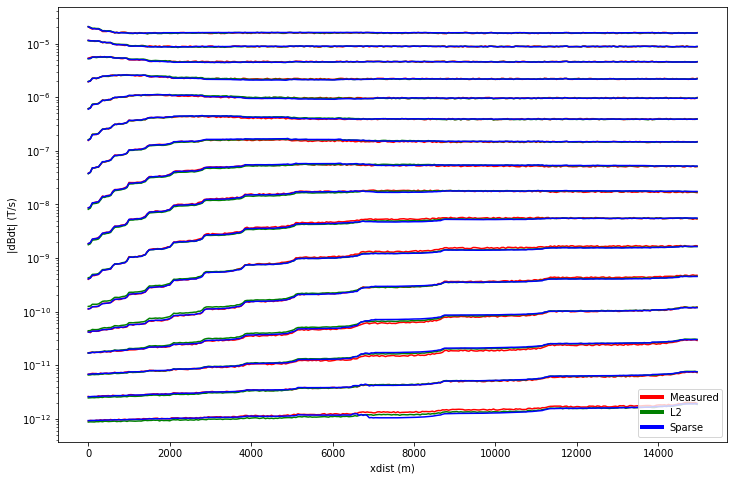

In [9]:
fig = plt.figure(figsize=(12, 8))
ax=plt.gca()
xyz.plot_line(0, ax=ax, c="red", label="measured %(gate)i @ %(time).2e")
xyzl2fwd.plot_line(0, ax=ax, c="green", label="fwd %(gate)i @ %(time).2e")
xyzsparsefwd.plot_line(0, ax=ax, c="blue", label="fwd %(gate)i @ %(time).2e")
ax.legend([matplotlib.lines.Line2D([0], [0], color="red", lw=4),
           matplotlib.lines.Line2D([0], [0], color="green", lw=4),
           matplotlib.lines.Line2D([0], [0], color="blue", lw=4)],
          ['Measured', 'L2', "Sparse"])
plt.show()